# Worksheet 15

Name:  Youheng Yang\
UID: U45006780

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

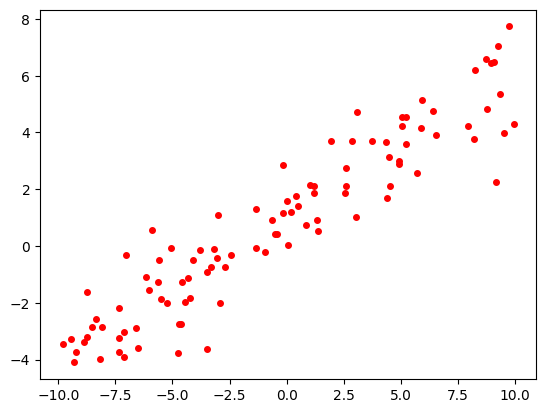

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

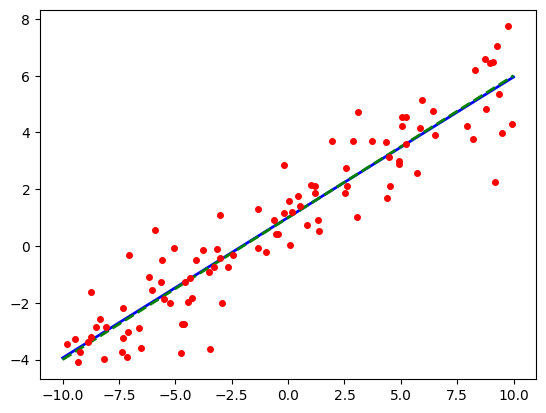

In [6]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
ytrueplot = 1 + .5 * xplot
plt.plot(xplot, ytrueplot,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

Very close

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

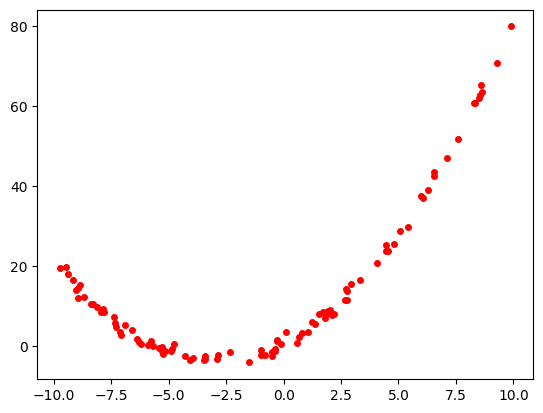

In [8]:
line = np.array([ 1 , 3, .5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin) + line[2]*xlin**2+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

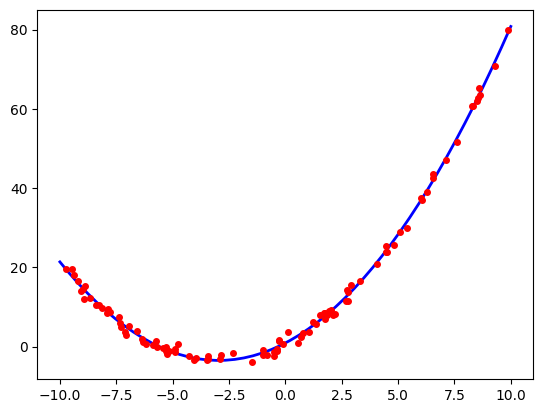

In [13]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin, xlin**2]).T
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot + beta_est[2] * xplot**2
plt.plot(xplot, yestplot,'b-',lw=2)
ytrueplot = 1 + 3 * xplot + .5 * xplot**2
plt.plot(xplot, ytrueplot,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Pretty close

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

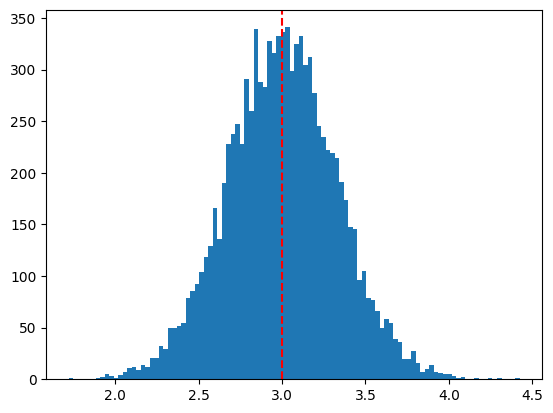

In [14]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, .5])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1]*xlin + true_beta[2]*xlin**2
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ ylin)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()